In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import random
import sqlite3
import pandas as pd

In [ ]:
import penney_db
from importlib import reload
reload(penney_db);
from penney_db import DB

In [ ]:
sql1="""
SELECT p1_guess,p2_guess, P1ProbWinCard, P1ProbWinTrick
FROM(
    SELECT p1_guess, p2_guess, IFNULL(P1WinCardCount,0) AS P1CardWinCount , TimesPlayed, IFNULL(1.* P1WinCardCount/TimesPlayed,0) AS P1ProbWinCard
    FROM(
        SELECT p1_guess, p2_guess, P1WinCardCount, Count(*) AS TimesPlayed  
        FROM tPenney
        LEFT JOIN(
            SELECT p1_guess, p2_guess, win_cards, Count(*) as P1WinCardCount 
            FROM tPenney
            WHERE win_cards='p1'
            GROUP BY p1_guess,p2_guess
        ) 
        USING (p1_guess,p2_guess)
        GROUP BY p1_guess, p2_guess
    )
)  
JOIN(
    SELECT p1_guess, p2_guess, IFNULL(P1WinTrickCount,0) AS P1CardTrickCount , TimesPlayed_1, IFNULL(1.* P1WinTrickCount/TimesPlayed_1,0) AS P1ProbWinTrick
    FROM(
        SELECT p1_guess, p2_guess, P1WinTrickCount, Count(*) AS TimesPlayed_1
        FROM tPenney
        LEFT JOIN(
            SELECT p1_guess, p2_guess, win_tricks, Count(*) AS P1WinTrickCount 
            FROM tPenney
            WHERE win_tricks='p1'
            GROUP BY p1_guess,p2_guess
        ) 
        USING (p1_guess,p2_guess)
        GROUP BY p1_guess, p2_guess
        )
    ) 
USING (p1_guess, p2_guess)

"""
prob_df=d.run_query(sql1)

prob_p1card=np.reshape(prob_df['P1ProbWinCard'].values, (8,8))
prob_p1trick=np.reshape(prob_df['P1ProbWinTrick'].values, (8,8))

In [ ]:
sql2='''
SELECT TimesPlayed
FROM(
    SELECT p1_guess, p2_guess, P1WinTrickCount, Count(*) AS TimesPlayed
        FROM tPenney
        LEFT JOIN (
            SELECT p1_guess, p2_guess, win_tricks, Count(*) AS P1WinTrickCount 
            FROM tPenney
            WHERE win_tricks='p1'
            GROUP BY p1_guess,p2_guess
        ) 
        USING (p1_guess,p2_guess)
    GROUP BY p1_guess, p2_guess
)
LIMIT 1
'''
decks = d.run_query(sql2)
n = decks['TimesPlayed]

In [ ]:
viz_input={'Cards':prob_p1card, 'Tricks':prob_p1trick, 'n':n}

In [5]:
data1 = np.random.rand(8, 8)
data2 = np.random.rand(8, 8)
n = 1
test_data = {'Cards':data1, 'Tricks':data2, 'n':n}

In [8]:
#order needs to be confirmed with the data
def create_heatmap(results: dict):
#we can make the stipulation that new data has to be entered in this format so the x an y labels don't change
    var_cards = results['Cards']
    var_tricks = results['Tricks']
    n = results['n']
    x_axis_labels = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'] #player 1 
    y_axis_labels = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'] #player 2

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    sns.heatmap(var_cards, annot= True, annot_kws={"size": 7},linewidths=.5, fmt=".2f", cmap='flare', 
                ax=ax1, cbar=False, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax1.set_title('Win by Cards')
    ax1.set_xlabel('Player 1 Guesses', fontsize=7)
    ax1.set_ylabel('Player 2 Guesses', fontsize=7)

    sns.heatmap(var_tricks, annot= True, annot_kws={"size": 7},linewidths=.5, fmt=".2f", cmap='flare', 
                ax=ax2, cbar=False, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax2.set_title('Win by Tricks')
    ax2.set_xlabel('Player 1 Guesses', fontsize=7)
    ax2.set_ylabel('Player 2 Guesses', fontsize=7)
    
    cbar_ax = fig.add_axes([.95, 0.11, 0.02, .77])
    cb = fig.colorbar(ax1.collections[0], cax=cbar_ax)
    cb.outline.set_linewidth(.2)

    plt.subplots_adjust(wspace=0.25)
    plt.suptitle('Probability of Player 1 Winning The Penney Game (n='+str(n)+')', y=1.07, fontsize = 15)
    plt.savefig('figures/heatmap_n'+str(n)+'.png', bbox_inches = 'tight', facecolor = 'white')
    plt.show()

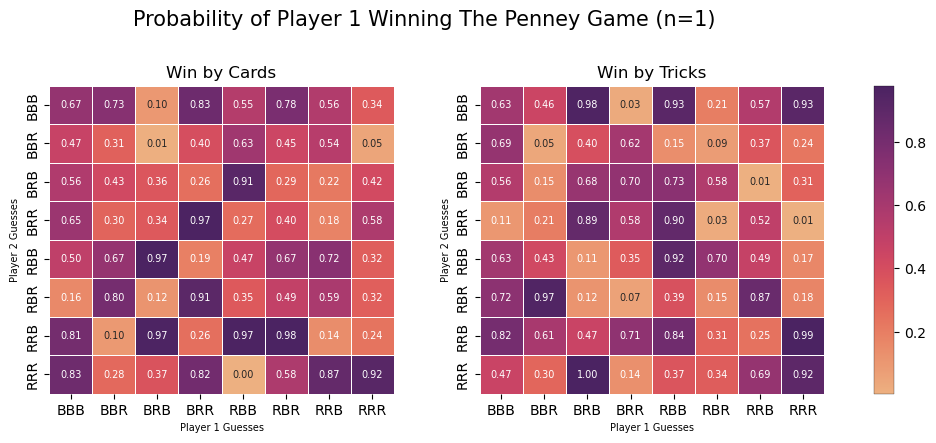

In [9]:
create_heatmap(test_data)